## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [43]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi

/bin/sh: nvidia-smi: command not found


In [44]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [45]:
train, test = keras.datasets.cifar10.load_data()

In [46]:
## 資料前處理
"""
Your code here
"""
import numpy as np

def preproc_x(x, flatten=True):
    max_val = np.max(x)
    min_val = np.min(x)
    x = ((x - min_val) / (max_val - min_val) - 0.5)*2
    
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [47]:
x_train, y_train = train
x_test, y_test = test


# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)


In [48]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model_num_neurons = [1024, 512, 512, 512, 512, 512, 512, 512, 256, 128]
model = build_mlp(input_shape=x_train.shape[1:], num_neurons=model_num_neurons)
model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 1024)              3146752   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 512)               524800    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 512)               262656    
_________________________________________________________________
hidden_layer4 (Dense)        (None, 512)               262656    
_________________________________________________________________
hidden_layer5 (Dense)        (None, 512)               262656    
_________________________________________________________________
hidden_layer6 (Dense)        (None, 512)               2626

In [49]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [50]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [51]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 45s 892us/step - loss: 1.7777 - accuracy: 0.3586 - val_loss: 1.6326 - val_accuracy: 0.4242
Epoch 2/100
50000/50000 [==============================] - 28s 565us/step - loss: 1.5387 - accuracy: 0.4556 - val_loss: 1.5075 - val_accuracy: 0.4678
Epoch 3/100
50000/50000 [==============================] - 30s 595us/step - loss: 1.4178 - accuracy: 0.5000 - val_loss: 1.4570 - val_accuracy: 0.4881
Epoch 4/100
50000/50000 [==============================] - 29s 576us/step - loss: 1.3122 - accuracy: 0.5372 - val_loss: 1.3826 - val_accuracy: 0.5255
Epoch 5/100
50000/50000 [==============================] - 26s 530us/step - loss: 1.2249 - accuracy: 0.5696 - val_loss: 1.4064 - val_accuracy: 0.5108
Epoch 6/100
50000/50000 [==============================] - 29s 582us/step - loss: 1.1400 - accuracy: 0.6015 - val_loss: 1.3709 - val_accuracy: 0.5311
Epoch 7/100
50000/50000 [=========================

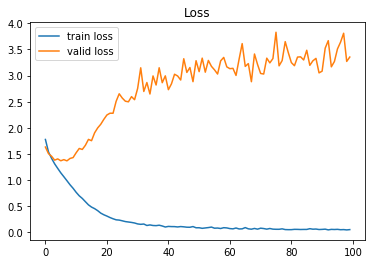

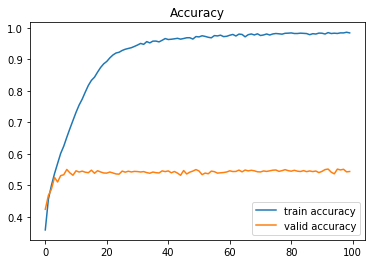

In [52]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()